In [1]:
import scipy.io as sio
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

Using TensorFlow backend.


In [2]:
#loading data
DDataFile = 'E:\\MEng_Project\\Keras_Data_1\\D_VLOS_scaled_mean_mean_alpha6_fft_abs_Frobenius_sphericalWave_B32_U2048.mat'
DData = sio.loadmat(DDataFile)

LocationDataFile = 'E:\\MEng_Project\\Keras_Data_1\\randLocationU2048VIP.mat'
locationData = sio.loadmat(LocationDataFile)

In [3]:
#preprocessing the data
D_data = DData['D']
location_data = locationData['location']
location_data = location_data[:2,:]

l, total = D_data.shape
d, total = location_data.shape

train_length = int(np.floor(total * 0.7))

impulses_train = np.transpose(D_data[:, :train_length])
location_train = np.transpose(location_data[:,:train_length])

impulses_test = np.transpose(D_data[:, train_length:])
location_test = np.transpose(location_data[:,train_length:])


In [18]:
#Build the model
model = keras.Sequential()

keras.layers.normalization.BatchNormalization()#epsilon=1e-06, mode=0, momentum=0.9, weights=None)
model.add(Dropout(0.2)) # best 0.2
model.add(Dense(2048, activation = 'relu'))  #tanh(343,1794)   relu (680,1600)   #the hidden layer number 

keras.layers.normalization.BatchNormalization()
model.add(Dropout(0.2)) # best 0.2
model.add(Dense(2048, activation = 'relu'))  #tanh(343,1794)   relu (680,1600)   #the hidden layer number 

keras.layers.normalization.BatchNormalization()
model.add(Dropout(0.2)) # best 0.2
model.add(Dense(2048, activation = 'relu'))  #tanh(343,1794)   relu (680,1600)   #the hidden layer number 

model.add(Dense(d, activation = 'linear'))  # None is different from 'linear'      ### the output layer

In [19]:
#Compilation
loss_func = 'mean_squared_error'   #   categorical_crossentropy(bad)   mean_squared_error
opt_func = keras.optimizers.Adam(lr=0.01) #'Adam'  lr=0.2  #  RMSprop(overfiiting) sgd(overfitting)  Adadelta(overfitting)   Adam

model.compile(loss = loss_func, 
              optimizer = opt_func,
             metrics = ['mae'])

#best set: categorical_crossentropy  and sgd, but the loss and acc do not change....

In [20]:
#Train the model, iterating
early_stop = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.1)
history = model.fit(impulses_train, location_train,
                    batch_size = 20, # 10,20
                    epochs = 100,
                    verbose = 2,
                   # callbacks=[early_stop], 
                    validation_split = 0.2 #0.2
                    #validation_data=(impulses_test, location_test)
                   )


Train on 1146 samples, validate on 287 samples
Epoch 1/100
 - 9s - loss: 72606.7742 - mean_absolute_error: 199.4647 - val_loss: 42040.7629 - val_mean_absolute_error: 151.9105
Epoch 2/100
 - 8s - loss: 41628.4223 - mean_absolute_error: 149.6812 - val_loss: 36826.1954 - val_mean_absolute_error: 146.6043
Epoch 3/100
 - 8s - loss: 14516.7899 - mean_absolute_error: 89.7129 - val_loss: 7405.1279 - val_mean_absolute_error: 68.7927
Epoch 4/100
 - 8s - loss: 7405.6573 - mean_absolute_error: 66.9096 - val_loss: 5002.9043 - val_mean_absolute_error: 55.1598
Epoch 5/100
 - 8s - loss: 5776.5786 - mean_absolute_error: 58.1005 - val_loss: 4427.1850 - val_mean_absolute_error: 52.7179
Epoch 6/100
 - 9s - loss: 4740.5435 - mean_absolute_error: 53.4367 - val_loss: 3502.7071 - val_mean_absolute_error: 46.7069
Epoch 7/100
 - 8s - loss: 4491.4498 - mean_absolute_error: 51.2368 - val_loss: 3898.6646 - val_mean_absolute_error: 47.6764
Epoch 8/100
 - 8s - loss: 4218.8102 - mean_absolute_error: 49.6697 - val_los

Epoch 67/100
 - 9s - loss: 2452.7490 - mean_absolute_error: 37.4294 - val_loss: 2454.2101 - val_mean_absolute_error: 37.1157
Epoch 68/100
 - 8s - loss: 2311.9727 - mean_absolute_error: 36.9610 - val_loss: 2333.2048 - val_mean_absolute_error: 36.3845
Epoch 69/100
 - 8s - loss: 2221.3205 - mean_absolute_error: 35.0858 - val_loss: 2148.4228 - val_mean_absolute_error: 35.5436
Epoch 70/100
 - 8s - loss: 2272.7074 - mean_absolute_error: 36.4023 - val_loss: 2359.6270 - val_mean_absolute_error: 36.1873
Epoch 71/100
 - 9s - loss: 2227.4930 - mean_absolute_error: 35.3000 - val_loss: 2233.7102 - val_mean_absolute_error: 35.4274
Epoch 72/100
 - 8s - loss: 2657.2604 - mean_absolute_error: 39.3022 - val_loss: 2260.6811 - val_mean_absolute_error: 35.4038
Epoch 73/100
 - 8s - loss: 2289.0926 - mean_absolute_error: 36.4435 - val_loss: 2420.2994 - val_mean_absolute_error: 37.9081
Epoch 74/100
 - 9s - loss: 2428.0173 - mean_absolute_error: 37.4971 - val_loss: 2364.1557 - val_mean_absolute_error: 36.5391


In [21]:
#make prediction
loc_prediction = model.predict(impulses_test)
print(loc_prediction.shape)
print(location_test.shape)

(615, 2)
(615, 2)


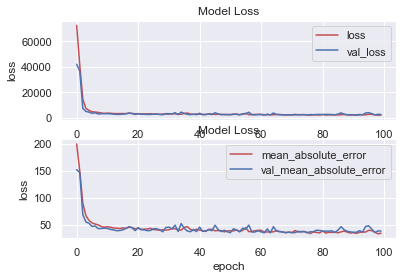

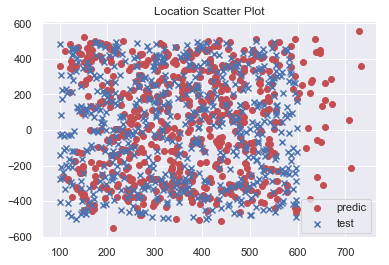

In [22]:
#plot the loss data


plt.subplot(211)
plt.plot(history.history['loss'],'r',label = 'loss')
plt.plot(history.history['val_loss'],'b', label = 'val_loss')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()


plt.subplot(212)
plt.plot(history.history['mean_absolute_error'],'r',label = 'mean_absolute_error')
plt.plot(history.history['val_mean_absolute_error'],'b', label = 'val_mean_absolute_error')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_title('Location Scatter Plot')
ax1.scatter(loc_prediction[:,0],loc_prediction[:,1],c = 'r',marker = 'o', label = 'predic')
ax1.scatter(location_test[:,0],location_test[:,1],c = 'b',marker = 'x', label = 'test')
plt.legend()
plt.show()

In [34]:
#The training result
loss = model.evaluate(impulses_test, location_test, verbose=1)
print ('Test loss & mean_absolute_error: ', loss)
#loss, acc = model.evaluate(impulses_test, location_test, verbose=0)
#print ('Test accuracy', acc)

615/615 [==============================] - 0s 456us/step
Test loss & mean_absolute_error:  [2643.7979373094513, 39.69265395994109]


39.69265376528186
59.88007551444464


Text(0, 0.5, 'error')

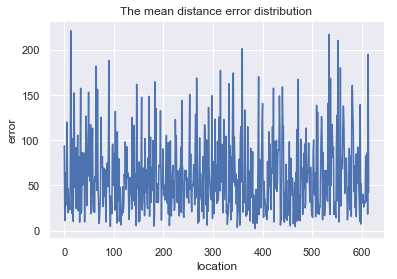

In [40]:
#calculate the mean of error distance
err = loc_prediction - location_test
x = err[:,:1]
y = err[:,1:]

err_abs = np.abs(err)

err_abs_mean = np.mean(err_abs)
print(err_abs_mean)
#print(err_abs_mean.shape)
err_dis = np.sqrt(np.square(x)+np.square(y))
err_avg = np.mean(err_dis)
print(err_avg)
#set the value of x, y, z
x,y,z = location_test[:,:1],location_test[:,1:2],err_dis
z_max = np.round(max(z))
z_min = np.round(max(z))

#plot the 2D image of error 
plt.plot(err_dis)
plt.title("The mean distance error distribution")
plt.xlabel("location")
plt.ylabel("error")


Text(0.5, 0.92, 'The mean distance error of 3D Iamge')

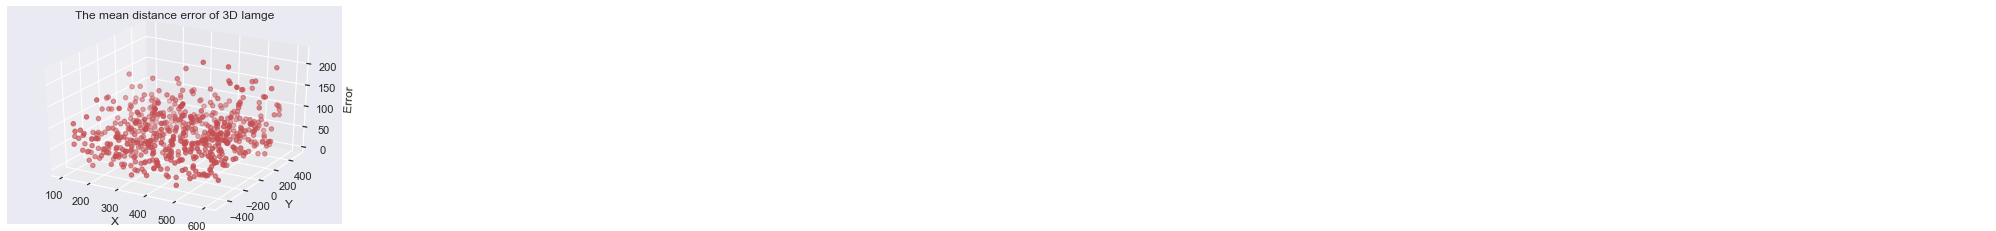

In [25]:
#plot 3D image
ax = plt.subplot(111,projection='3d')
ax.scatter(x,y,z,c='r')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Error")
plt.title("The mean distance error of 3D Iamge")

Text(0.5, 1.0, "The mean distance error of 'heat map'")

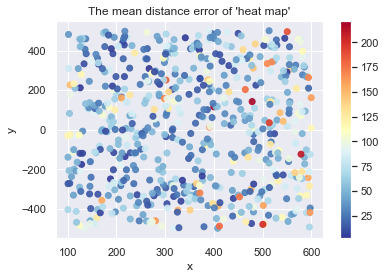

In [26]:
#draw the "heatmap" of error
fig = plt.figure()
ax3 = fig.add_subplot(111)
cm = plt.cm.get_cmap('RdYlBu_r') #Accent   RdYlBu  Blues_r  Greens  YlOrBr_r

sc = ax3.scatter(x,y,c = z, marker = 'o', label = 'test',alpha=0.9, cmap=cm)
plt.colorbar(sc)
ax3.set_xlabel("x")
ax3.set_ylabel("y")
plt.title("The mean distance error of 'heat map'")